## Finding the Best Markets to Advertise In

![Image](https://www.evolmind.com/articulos/img/2018/05/guia-elearning-1024x484.jpg)

### Introduction

In this project we're working for an an e-learning company that offers courses on programming. Courses cove a lot of different areas like web and mobile development, data science, game development, etc. Our bosses want to invest some money in advertisement for company products. We need to find out the two best markets to advertise in.

To reach our goal, fristly we need some data. Clearly we could organize surveys for different markets but this is very costly. Our best option here is to find already existing data and try to work with it. And there is one good source for that - the data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/).

[FreeCodeCamp](https://www.freecodecamp.org/) is another e-learning platform that offers courses on web development. But they also run a popular Medium publication, which attracts new coders with varying interests to their survey.

We can download the data from this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


### Is the data representative? 

As we said above our company offer courses for different subjects. So we're intresting in different categories of people are represented in this survey. And `JobRoleInterest` column will help us.

Let's take a look at it's structure.

In [3]:
survey['JobRoleInterest'].head()

0                                                  NaN
1                             Full-Stack Web Developer
2      Front-End Web Developer, Back-End Web Develo...
3      Front-End Web Developer, Full-Stack Web Deve...
4    Full-Stack Web Developer, Information Security...
Name: JobRoleInterest, dtype: object

Every row can have both: no value at all, single or several values. Different values are separated by comma.

In [4]:
survey['JobRoleInterest'].value_counts(dropna=False,
                                      normalize=True
                                      ).head()

NaN                          0.615296
Full-Stack Web Developer     0.045282
  Front-End Web Developer    0.024759
  Data Scientist             0.008363
Back-End Web Developer       0.007813
Name: JobRoleInterest, dtype: float64

There is a lot of `NaN` values - about **61%**.

Let's drop them and count how many single and several values are in the column.

One        32.0
Several    68.0
Name: JobRoleInterest, dtype: float64

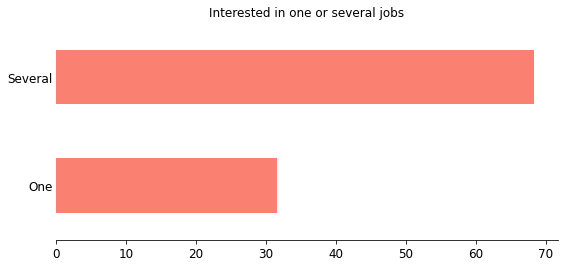

In [5]:
job_role_no_nans = survey['JobRoleInterest'].dropna()

roles_qty = job_role_no_nans.apply(lambda x: 'Several' if ',' in x else 'One')

roles_pct = roles_qty.value_counts(normalize=True,
                                  ascending=True) * 100

def create_barh(series, title):
    #Build a horizontal bar plot from series
    ax = series.plot.barh(color='salmon',
                          figsize=(9,4),
                          fontsize=12,
                          title=title)

    for spine in ['left', 'top', 'right']:
        ax.spines[spine].set_visible(False)
        
    ax.tick_params(axis='y', which='both', length=0)
    return None
    
create_barh(roles_pct,
            title='Interested in one or several jobs')

round(roles_pct)

It's clearly that most people are interested in more than one subject. And this fact is our advantage. Seems a lot of beginers don't know exactly which subject to learn. So they could decide to start a few courses at the same time.

Also let's check how many people are interested in **mobile** or **web** development because our our courses focus on these subjects.

Other            14.0
Mobile or Web    86.0
Name: JobRoleInterest, dtype: float64

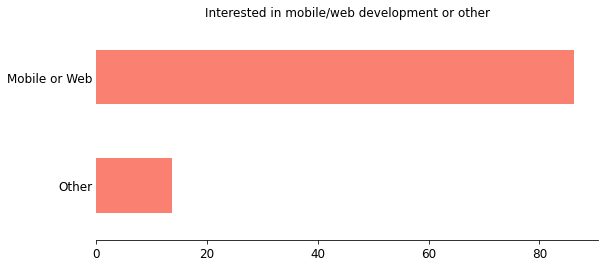

In [6]:
mob_web_qty = job_role_no_nans.apply(lambda x: 'Mobile or Web' if ('Mobile' in x
                                                                  ) or ('Web' in x) else 'Other')

mob_web_pct = mob_web_qty.value_counts(normalize=True,
                                       ascending=True) * 100

create_barh(mob_web_pct,
            title='Interested in mobile/web development or other')
    
round(mob_web_pct)

In [7]:
total_mob_web = job_role_no_nans.str.contains('Mobile|Web').sum()
print(total_mob_web, 'learners are interested in web and mobile development')

6034 learners are interested in web and mobile development


That's great! The majority of learners is interested in exactly our main subjects.

### Time for analysis

So far we've made sure that our data fits our purposes and now we can analyze it. We want to answer several questions about  new coders that are interested in the subjects we teach:

* Where are these new coders located
* What are the locations with the greatest number of new coders
* How much money new coders are willing to spend on learning

#### Locations

Let's go in that order and take a look at learners locations which are stored in the `CountryLive` column. There is also the `CountryCitizen` column - country of origin for learners. But we want to work with actual info. 

In [8]:
#Drop rows in the original data set without any role
survey_no_nans = survey.dropna(subset=['JobRoleInterest']).copy()

best_countries = pd.DataFrame(columns=['Absolute number', 'Percentage'])

best_countries['Absolute number'] = survey_no_nans['CountryLive'].value_counts()
best_countries['Percentage'] = round(
    survey_no_nans['CountryLive'].value_counts(normalize=True) * 100)

best_countries.head()

,Absolute number,Percentage
United States of America,3125,46.0
India,528,8.0
United Kingdom,315,5.0
Canada,260,4.0
Poland,131,2.0


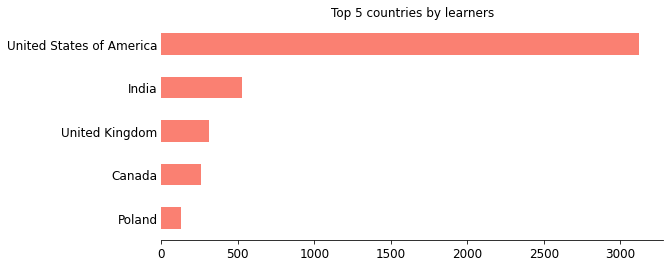

In [9]:
#Save top for later
top5_countries = best_countries.head().index.to_list()

create_barh(best_countries['Absolute number'].sort_values().tail(),
            title='Top 5 countries by learners')

On the chart above we can see clearly top 5 countries and even more. The USA is dominating - **46%** of learners are from there. **USA** is our best market for sure.

But there is some problem with the second place. Even so **8%** of learners are from **India** it's not very different from the third place - **United Kingdom** with **5%**.

We should explore more to become completely sure about our choice. And it's time to answer third question. 

#### Spending money

The `MoneyForLearning` column describes the total amount of money spent by participants for their learning. But our company sells subscriptions at a price of **$59** per month.

For this reason we should find out how much money each student spends per month. For that we can divide the total amount of money by number of learning month which is stored in the `MonthsProgramming` column.

In [10]:
#Replace 0 month with 1 for learners that had just sturted their course
survey_no_nans['MonthsProgramming'].replace(0, 1, inplace=True)

survey_no_nans['MoneyPerMonth'] = survey_no_nans['MoneyForLearning'] / survey_no_nans['MonthsProgramming']
survey_no_nans['MoneyPerMonth'].head()

1     13.333333
2    200.000000
3      0.000000
4      0.000000
6      0.000000
Name: MoneyPerMonth, dtype: float64

We've avoided division by zero problem but there are null values in the new column.

In [11]:
print(survey_no_nans['MoneyPerMonth'].isnull().sum(), 'rows with null value')

675 rows with null value


Let's delete these rows. Also we'll delete rows that have null values in the `CountryLive` column.

Then we could group the remaining data.

In [12]:
clean_survey = survey_no_nans.dropna(
    subset=['MoneyPerMonth', 'CountryLive']).copy()

mean_money_country = clean_survey.groupby('CountryLive')['MoneyPerMonth'].mean()
mean_money_country.sort_values(ascending=False)

CountryLive
Yemen          10000.000000
Puerto Rico     4291.394558
Austria          936.208333
Spain            784.553084
Jamaica          747.037037
                   ...     
Honduras           0.000000
Jordan             0.000000
Mozambique         0.000000
Nambia             0.000000
Kyrgyzstan         0.000000
Name: MoneyPerMonth, Length: 131, dtype: float64

Analysing all countries is useless because outliner like `Yemen` with **1** potential student and his **$10k** per month.

So let's focus on top 5 countries by number of learners.

In [13]:
mean_money_country[top5_countries].sort_values(ascending=False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
Poland                       75.678935
United Kingdom               45.534443
Name: MoneyPerMonth, dtype: float64

**USA** and **India** are top two positions still. Also **Canada** and especially **UK** results are surprisingly low relative to India. 

We've expexted to see all three countries (USA, UK and Canada) higher than India due to higher [gross domestic product (GDP)](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita#Lists_of_countries_and_dependencies). So people can spend more money on learning in these countries.

![Image](https://preview.redd.it/2bvattca6zl61.png?width=640&crop=smart&auto=webp&s=8901c4449ed28ad6b06b8703406aef115b5cf9f4)

#### Are there outliers?

We can explain these results for two reasons:
* Not enough representative data for the United Kingdom, Canada, and India
* Some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada

Also it might be that the results are correct. Anyway we should check the data on outliers for Canada, UK and India. 

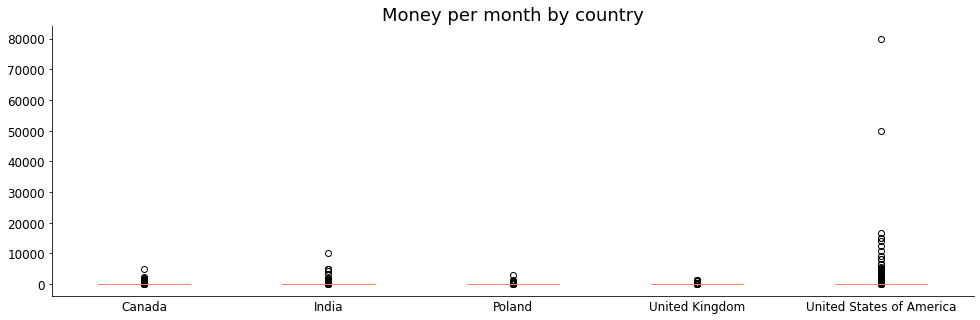

In [14]:
def create_box_plot(df, title):
    #Build a box plot from series
    ax = df.boxplot(by='CountryLive',
                    color='salmon',
                    grid=False,
                    figsize=(16,5),
                    fontsize=12)

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    
    #Decorations
    ax.set_title(title, fontsize=18)
    ax.set_xlabel('')
    plt.suptitle('')
    ax.tick_params(axis='x', which='both', length=0)
    return None


top5_for_box = clean_survey.loc[clean_survey['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada|Poland'), ['CountryLive','MoneyPerMonth']].copy()

create_box_plot(top5_for_box, 'Money per month by country')

There are extreme outliers: two for USA and one for India. There are probably more but first we'll deal with these three.

In [15]:
india_out = top5_for_box.loc[top5_for_box['CountryLive'] == 'India', 'MoneyPerMonth'].max()
india_idx_out = top5_for_box.loc[top5_for_box['CountryLive'] == 'India', 'MoneyPerMonth'].idxmax()

usa_out = top5_for_box.loc[top5_for_box['CountryLive'] == 'United States of America',
                       'MoneyPerMonth'].sort_values(ascending=False).head(2)

print('India outlier -', india_out, '\nUSA outliers:\n', usa_out)

India outlier - 10000.0 
USA outliers:
 14024    80000.0
2478     50000.0
Name: MoneyPerMonth, dtype: float64


Now we can remove them and build a plot again.

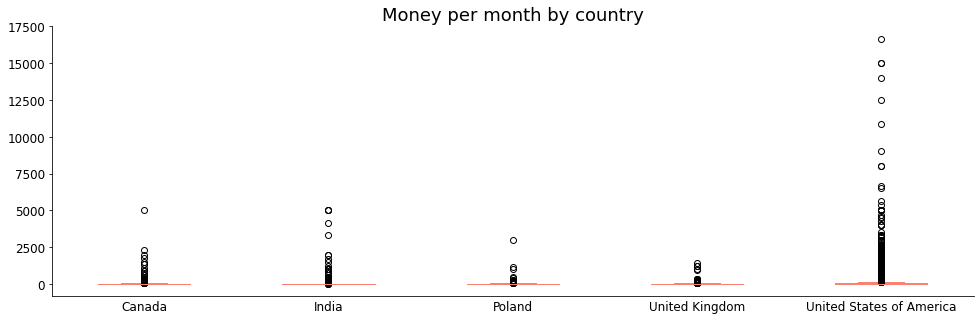

In [16]:
top5_no_out = top5_for_box[top5_for_box['MoneyPerMonth'] < 40000].copy()
top5_no_out = top5_no_out.drop(india_idx_out)

create_box_plot(top5_no_out, 'Money per month by country')

We should take a closer look at some more individuals:
* USA anything more than \$7.5k
* UK top 3 outlier more than ~\$1k 
* Poland top outlier about \$2.5k
* India  top 3 outlier more than ~\$2.5k
* Canada top outlier about \$5k

These individuals are outliers but not extreme as already removed. Probably we'll justify them by looking at bootcamps and month programming.

In [17]:
#Indicies list
out_indicies = []

#USA
usa_outliers = top5_no_out[(top5_no_out['CountryLive'] == 'United States of America') &
                          (top5_no_out['MoneyPerMonth'] > 7500)].index.to_list()

out_indicies += usa_outliers

#UK
uk_outliers = top5_no_out.loc[
    top5_no_out['CountryLive'] == 'United Kingdom',
    'MoneyPerMonth'].sort_values(ascending=False).head(3).index.to_list()

out_indicies += uk_outliers

#Poland
poland_outliers = top5_no_out.loc[
    top5_no_out['CountryLive'] == 'Poland',
    'MoneyPerMonth'].idxmax()

out_indicies.append(poland_outliers)

#India
india_outliers = top5_no_out.loc[
    top5_no_out['CountryLive'] == 'India',
    'MoneyPerMonth'].sort_values(ascending=False).head(3).index.to_list()

out_indicies += india_outliers

#Canada
canada_outliers = top5_no_out.loc[
    top5_no_out['CountryLive'] == 'Canada',
    'MoneyPerMonth'].idxmax()

out_indicies.append(canada_outliers)

justify_it = clean_survey.loc[out_indicies,
                              ['AttendedBootcamp',
                               'BootcampFinish',
                               'MonthsProgramming',
                               'MoneyPerMonth']]

justify_it

,AttendedBootcamp,BootcampFinish,MonthsProgramming,MoneyPerMonth
718,1.0,0.0,1.0,8000.000000
3184,1.0,1.0,1.0,9000.000000
3930,0.0,NaN,6.0,10833.333333
6805,1.0,1.0,1.0,15000.000000
7198,0.0,NaN,5.0,14000.000000
9778,1.0,0.0,1.0,8000.000000
16650,0.0,NaN,12.0,16666.666667
16997,0.0,NaN,1.0,12500.000000
17231,0.0,NaN,2.0,15000.000000
8948,1.0,1.0,5.0,1400.000000


Let's assume that student could spend significant amount of money if he **attended a bootcamp** or have been programming for **5 month** or more.

So we'll keep that individuals and remove the others.

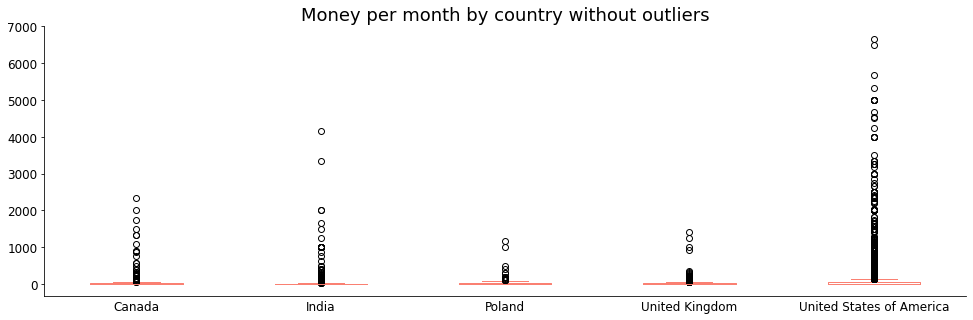

In [18]:
not_justified = justify_it[(justify_it['AttendedBootcamp'] == 0
                           ) | (justify_it['MonthsProgramming'] < 5)].index

top5_no_out = top5_no_out.drop(not_justified)
create_box_plot(top5_no_out, 'Money per month by country without outliers')

In [19]:
mean_money_top5 = top5_no_out.groupby('CountryLive')['MoneyPerMonth'].mean()
mean_money_top5.sort_values(ascending=False)

CountryLive
United States of America    147.063012
Canada                       93.065400
India                        81.812102
Poland                       51.510992
United Kingdom               41.381689
Name: MoneyPerMonth, dtype: float64

In [20]:
top5_no_out['CountryLive'].value_counts()

United States of America    2922
India                        459
United Kingdom               278
Canada                       239
Poland                       121
Name: CountryLive, dtype: int64

### Conclusions

We've clearly defined the best market to to advertise in - it's **USA**. There are **2922** potential students that are willing to spend on average**~\$146** on their learning.

The second one is not so obvious. On the one hand we have **Canada** with **239** student and average payment about **\$93**. On the other - **India** and **459** with average **\$82**.

With these results we have several options:
* Adverise in USA and India
* Adverise in USA and Canada
* Adverise in USA, India and Canada
* Adverise in USA only

For any combination we should split advertisement budget unequally, USA - 70\% and India - 30\% for example. And also we can discuss these options with someone from marketing team.